A pipeline for processing single-cell RNA-seq data for bladder cancer

This pipeline is based on dataset [GSE146137](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE146137).


# Preprocessing

In [1]:
import os
import numpy as np
import scanpy as sc
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from scipy.stats import median_abs_deviation as mad
%matplotlib inline

In [2]:
data_path = "data/"
check_path = "checkpoints/"

# os.makedirs(check_path)

os.chdir("../")
print(os.getcwd())

/Users/flynnzhang/CMU/Spring24/02620-ML4Scientists/scRNA-seq_ML


In [3]:
import warnings
warnings.simplefilter("ignore", FutureWarning)
warnings.simplefilter("ignore", UserWarning)
warnings.simplefilter("ignore", RuntimeWarning)

## Data Preprocess Done!

In [4]:
adata = sc.read_h5ad(check_path + 'harmony.h5ad')

In [5]:
adata

AnnData object with n_obs × n_vars = 23873 × 2723
    obs: 'Sample', 'Title', 'Marker', 'n_genes', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'pct_counts_mt', 'pct_counts_ribo', 'pct_counts_hb', 'batch'
    var: 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'batch_colors', 'hvg', 'log1p', 'neighbors', 'umap'
    obsm: 'X_pca', 'X_pca_harmony', 'X_umap'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

## Leiden

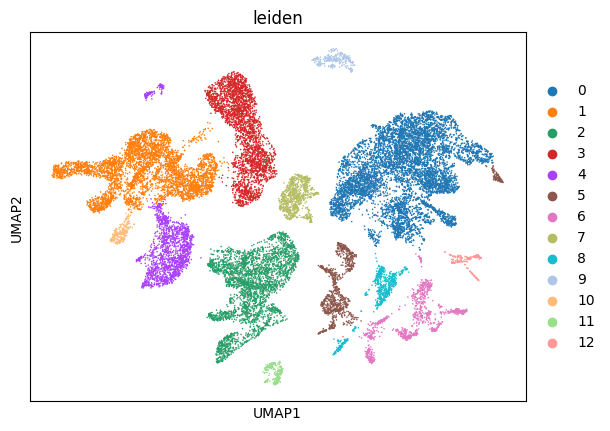

In [6]:
sc.tl.leiden(adata, resolution = 0.1)
sc.pl.umap(adata, color = 'leiden')

In [10]:
adata.obs['leiden'].value_counts()

leiden
0     7189
1     4449
2     3181
3     2877
4     1720
5     1038
6     1004
7      806
8      655
9      283
10     235
11     233
12     203
Name: count, dtype: int64

## Add cluster label

In [11]:
adata

AnnData object with n_obs × n_vars = 23873 × 2723
    obs: 'Sample', 'Title', 'Marker', 'n_genes', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'pct_counts_mt', 'pct_counts_ribo', 'pct_counts_hb', 'batch', 'leiden'
    var: 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'batch_colors', 'hvg', 'log1p', 'neighbors', 'umap', 'leiden', 'leiden_colors'
    obsm: 'X_pca', 'X_pca_harmony', 'X_umap'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

In [12]:
adata_combined = sc.read_h5ad(check_path + 'combined.h5ad')

In [13]:
# Map the cluster results
adata_combined.obs['kmeans_clusters'] = adata.obs['leiden']
adata_combined

AnnData object with n_obs × n_vars = 23873 × 19724
    obs: 'Sample', 'Title', 'Marker', 'n_genes', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'pct_counts_mt', 'pct_counts_ribo', 'pct_counts_hb', 'batch', 'kmeans_clusters'
    var: 'n_cells'
    uns: 'log1p'
    layers: 'counts'

In [14]:
adata_combined.write_h5ad(check_path + 'combined_labeled.h5ad')